# Worksheet 12

Name: Haokun Wu
UID: U18377013

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes 
2. NO
3. Yes
4. No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

1. Split the dataset into training, validation, and test sets.
2. Train the model using the training set.
3. Fine-tune with the validation set.
4. Evaluate performance on the test set.
5. Use metrics appropriate for the problem type.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

- **Underfitting**: When a model is too simple to capture the patterns in the data. It performs poorly on both the training and test sets. 
  - *Signs*: Low accuracy on both training and test data; the model doesn't improve even with more data.

- **Overfitting**: When a model is too complex and fits the training data too closely, including its noise and outliers. It performs well on the training set but poorly on new, unseen data.
  - *Signs*: High accuracy on training data but a significant drop in performance on the test set or new data.

### K Nearest Neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

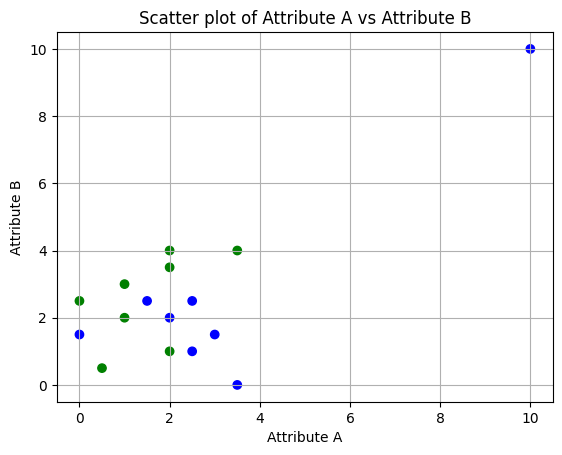

In [3]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter plot of Attribute A vs Attribute B')
plt.grid(True)
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

In [4]:
# Indices of potential outliers
outlier_indices = [i for i, (a, b) in enumerate(zip(data["Attribute A"], data["Attribute B"])) if a == 10 and b == 10]

# Removing outliers from the dataset
for i in reversed(outlier_indices):  # reverse to avoid index out of range
    for key in data:
        del data[key][i]


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The point around (0.5, 0.5) seems to be somewhat isolated from the other blue points.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

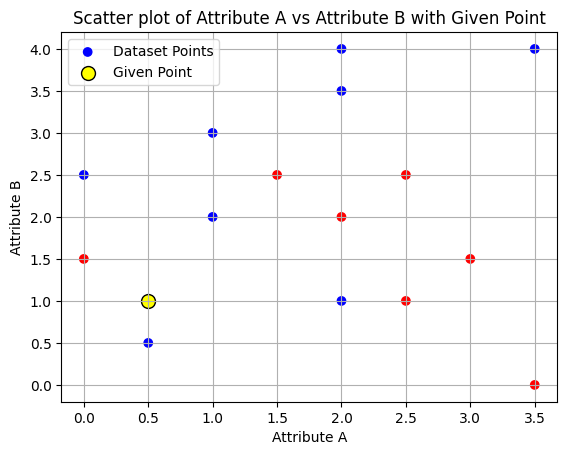

In [5]:
# Given point
point_A = 0.5
point_B = 1

# Colors for the existing dataset points based on their class
colors = np.array(['r', 'b'])  # 'r' for class 1 and 'b' for class 0

# Plotting the existing points
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist(), label='Dataset Points')
# Plotting the given point
plt.scatter(point_A, point_B, color='yellow', s=100, edgecolors='black', label='Given Point')  # s is size for better visibility
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter plot of Attribute A vs Attribute B with Given Point')
plt.legend()
plt.grid(True)
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

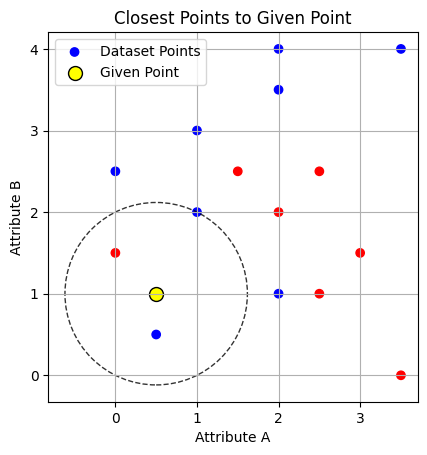

In [6]:
def n_closest_to(example, n):
    # Compute distances
    distances = [np.sqrt((x - example[0])**2 + (y - example[1])**2) for x, y in zip(data["Attribute A"], data["Attribute B"])]
    # Sort distances and get indices of the n smallest
    closest_indices = np.argsort(distances)[:n]
    return closest_indices, distances

example = (0.5, 1)
n = 3
closest_indices, distances = n_closest_to(example, n)

# Determine location and radius for the circle
location = example
radius = distances[closest_indices[-1]]  # the distance of the farthest of the three closest points

# Plot the data
_, axes = plt.subplots()
colors = np.array(['r', 'b'])  # 'r' for class 1 and 'b' for class 0
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist(), label='Dataset Points')
axes.scatter(example[0], example[1], color='yellow', s=100, edgecolors='black', label='Given Point')

# Plot the circle around the given point
cir = plt.Circle(location, radius, fill=False, alpha=0.8, linestyle='--')
axes.add_patch(cir)
axes.set_aspect('equal')  # necessary so that the circle is not oval
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Closest Points to Given Point')
plt.legend()
plt.grid(True)
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [7]:
def majority(points):
    # Extract class values of the points
    class_values = [data["Class"][i] for i in points]
    total = sum(class_values)
    
    # Majority rule with a tie-breaker for class 1
    if total > 1:
        return 1
    else:
        return 0  # if total == 0 or total == 1, return class 0

# Get the three closest points to the example
closest_indices, _ = n_closest_to((0.5, 1), 3)

# Determine and print the majority class
assigned_class = majority(closest_indices)
print(f"The class assigned to the new point is: {assigned_class}")


The class assigned to the new point is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [9]:
def classify_point(index, data):
    """
    Classifies a point given its index by treating it as a test point 
    and the rest of the dataset as the training set.
    """
    # Extract the point from the data
    point = (data["Attribute A"][index], data["Attribute B"][index])
    
    # Create a training set without the current point
    training_indices = list(range(len(data["Attribute A"])))
    training_indices.remove(index)
    
    # Find the closest points in the training set
    closest_indices, _ = n_closest_to(point, 3, training_indices)
    
    # Classify the point based on its neighbors
    return majority(closest_indices)

# Initialize the counter
count = 0
for i in range(len(data["Attribute A"])):
    # Get the actual class of the data point
    actual_class = data["Class"][i]
    
    # Predict the class of the data point
    prediction = classify_point(i, data)
    
    # If the prediction is correct, increment the counter
    if prediction == actual_class:
        count += 1

accuracy = count / len(data["Attribute A"])
print(f"overall accuracy = {accuracy:.2f}")


TypeError: n_closest_to() takes 2 positional arguments but 3 were given